# Dealing with data


## 1. The command line (Optional*)

PLEASE NOTE: TO RUN UNIX COMMANDS YOU SHOULD SELECT CORRECT OPTIONS WHEN INSTALLING GIT.

The command line is a text oriented way to perform operations with your operating system (looking at files, copying or creating folders, starting programs, etc). 

It can give you more control and provide a way to "look under the hood". In many cases, such as dealing with raw data files, the command line is faster. 

You should be familiar with the terminal or command line as well as some basic unix ("Bash") commands.

![Terminal](images/terminal.png)

Note: MS Windows provides a different set of command line commands from Unix. Apple computers include the full set of Unix commands as the operating system is more closely based on Unix. Linux is an implementation of Unix. When you installed the Anaconda distribution you had the option to install the Unix commands onto your system as well. 

### 1.1. File system 
To navigate the folder structure of the machine you are on you will typically use commands such as `ls` (list) and `cd` (change directory). You can make a directory with `mkdir` or move (`mv`) and copy (`cp`) files. To delete a file you can `rm` (remove) it. To print the contents of a file you can `cat` (concatenate) it to the screen.

Many commands have options you can set when running them. For example to get a listing of files as a vertical list you can pass the `-l` (list) flag, e.g. '`ls -l`'. During the normal course of using the command line, you will learn the most useful flags. The `-r` option is for recursive version of commands so that you can for example delete subfolders when you delete a directory with `rm -r` (be very careful with this command!).

If you want to see all possible options you can always read the `man` (manual) page for a command, e.g. '`man ls`'. When you are done reading the `man` page, you can exit by hitting `q` to quit.

You can use shell commands in IPython notebooks by prefixing the line with an exclamation point!

Before we do anything, lets take a look at the first few lines of the file to get an idea of what's in it.

## 2. Using Python, IPython, and Pandas
The command line is great for a first step in data exploration. However, to do some more in depth operations you will generally want to move to a language and environment better suited for involved data manipulation. Here, we will discuss the use of Python as a data crunching tool.
|
In this section we will only discuss the use of `pandas` to explore data with data frames. You can also explore data line by line by "streaming" it; but that is beyond this class. Streaming in data is very useful for highly unstructured data. If you are interested in this, feel free to ask about it on the class forums!

### 2.1. Example one: User exploration

For structured data like we have here, we will use `pandas`.

In [3]:
# Read in data/users.csv using Pandas
import pandas as pd
users = pd.read_csv("users.csv")

In [4]:
# Take a look at the Panda's DataFrame
users.head()

,user,variable1,variable2
0,parallelconcerned,145.391881,-6.081689
1,driftmvc,145.788700,-5.207083
2,snowdonevasive,144.295861,-5.826789
3,cobolglaucous,146.726242,-6.569828
4,stylishmugs,147.220050,-9.443383


In [5]:
# Add another column to this DataFrame
users['sum'] = users['variable1'] + users['variable2']
users.head()

,user,variable1,variable2,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


Python and Pandas allow us to do complex tasks very easily, such as plotting.

Let's visualize the relationship between variable1 vs. variable2 in these data with a scatterplot.

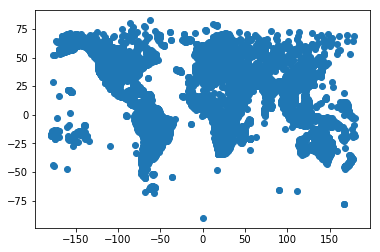

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(users['variable1'], users['variable2'])

We can update our DataFrame given the new information we discovered.

In [7]:
users.columns = ['user', 'feature1', 'feature2', 'sum']

users.head()

,user,feature1,feature2,sum
0,parallelconcerned,145.391881,-6.081689,139.310192
1,driftmvc,145.788700,-5.207083,140.581617
2,snowdonevasive,144.295861,-5.826789,138.469072
3,cobolglaucous,146.726242,-6.569828,140.156414
4,stylishmugs,147.220050,-9.443383,137.776667


### 2.2. Example 2: Survey responses
Let's read in an edited version of your survey responses. Since the data is very well structured (it's a nicely formatted .csv file) we will simply use `pandas`. This file is located in the `data/` folder.

In [8]:
# Read in data/users.csv using Pandas
import pandas as pd
survey = pd.read_csv('survey.csv')

Now that we have the data, let's take a look at what we have.

In [9]:
survey.head()

,timestamp,stern,regression,database,cloud,api,season,terminal,python,machinelearning,statistics,mathematics,datavisualization,business,communication,fruit
0,1,Finance,Yes,No,No,No,Summer,4,6,4,7,9,6,7,7,Apples
1,2,Finance,Yes,Yes,Yes,Yes,Fall,5,1,1,6,8,6,8,10,Oranges
2,3,Finance,Yes,No,No,No,Summer,1,5,1,5,8,1,6,8,Apples
3,4,Statistics,Yes,Yes,Yes,Yes,Summer,3,5,1,8,7,6,6,7,Apples
4,5,Information System,Yes,Yes,Yes,Yes,Fall,2,5,1,6,5,1,8,8,Oranges


We have a lot of data here. How can we start to make sense of it? Using the pandas `describe()` method, we can get a summary of the numeric features.

In [10]:
survey.describe()

,timestamp,terminal,python,machinelearning,statistics,mathematics,datavisualization,business,communication
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000
mean,21.000000,2.341463,3.487805,1.439024,5.951220,6.97561,4.487805,7.170732,7.609756
std,11.979149,1.931447,2.460914,0.975930,1.642425,1.35070,2.550705,1.828967,1.497966
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.00000,1.000000,1.000000,3.000000
25%,11.000000,1.000000,1.000000,1.000000,5.000000,6.00000,2.000000,7.000000,7.000000
50%,21.000000,1.000000,3.000000,1.000000,6.000000,7.00000,5.000000,8.000000,8.000000
75%,31.000000,3.000000,5.000000,1.000000,7.000000,8.00000,6.000000,8.000000,9.000000
max,41.000000,7.000000,8.000000,5.000000,8.000000,9.00000,9.000000,10.000000,10.000000


You might find it easier to flip the data frame,

In [11]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,41.0,21.000000,11.979149,1.0,11.0,21.0,31.0,41.0
terminal,41.0,2.341463,1.931447,1.0,1.0,1.0,3.0,7.0
python,41.0,3.487805,2.460914,1.0,1.0,3.0,5.0,8.0
machinelearning,41.0,1.439024,0.975930,1.0,1.0,1.0,1.0,5.0
statistics,41.0,5.951220,1.642425,1.0,5.0,6.0,7.0,8.0
mathematics,41.0,6.975610,1.350700,3.0,6.0,7.0,8.0,9.0
datavisualization,41.0,4.487805,2.550705,1.0,2.0,5.0,6.0,9.0
business,41.0,7.170732,1.828967,1.0,7.0,8.0,8.0,10.0
communication,41.0,7.609756,1.497966,3.0,7.0,8.0,9.0,10.0


Do we have other features that weren't listed here? Some that aren't numeric? Let's take a look.

In [12]:
survey.columns

Index(['timestamp', 'stern', 'regression', 'database', 'cloud', 'api',
       'season', 'terminal', 'python', 'machinelearning', 'statistics',
       'mathematics', 'datavisualization', 'business', 'communication',
       'fruit'],
      dtype='object')

There are more fields here than we saw in our description. If we go back and look at the head of the data, we will see a few fields are Yes/No. Let's turn these into 0's and 1's.

In [13]:
for field in ['regression', 'database', 'cloud', 'api']:
    survey[field] = (survey[field] == "Yes").astype('int')

In [14]:
survey.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,41.0,21.000000,11.979149,1.0,11.0,21.0,31.0,41.0
regression,41.0,0.682927,0.471117,0.0,0.0,1.0,1.0,1.0
database,41.0,0.365854,0.487652,0.0,0.0,0.0,1.0,1.0
cloud,41.0,0.219512,0.419058,0.0,0.0,0.0,0.0,1.0
api,41.0,0.268293,0.448575,0.0,0.0,0.0,1.0,1.0
terminal,41.0,2.341463,1.931447,1.0,1.0,1.0,3.0,7.0
python,41.0,3.487805,2.460914,1.0,1.0,3.0,5.0,8.0
machinelearning,41.0,1.439024,0.975930,1.0,1.0,1.0,1.0,5.0
statistics,41.0,5.951220,1.642425,1.0,5.0,6.0,7.0,8.0
mathematics,41.0,6.975610,1.350700,3.0,6.0,7.0,8.0,9.0


We have already seen how to get scatter plots in the previous example. Let's look at a histogram here.

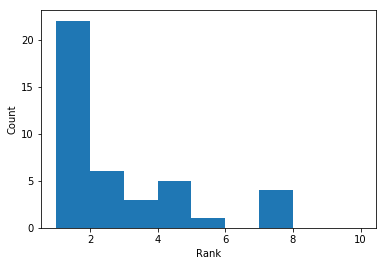

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(survey['terminal'], bins=range(1, 11))
plt.ylabel('Count')
plt.xlabel('Rank')
plt.show()

Let's look at one more type of plot. A very simple line graph. Maybe we are curious about the trend of experience given the timestamp a student submitted their survey. In our data, we have a `timestamp` field as well as all of the experience reports. Let's put a few on a graph and take a look.

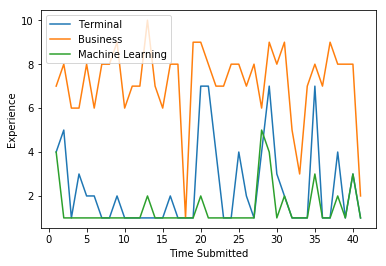

In [16]:
plt.plot(survey['timestamp'], survey['terminal'], label="Terminal")
plt.plot(survey['timestamp'], survey['business'], label="Business")
plt.plot(survey['timestamp'], survey['machinelearning'], label="Machine Learning")
plt.ylabel("Experience")
plt.xlabel("Time Submitted")
plt.legend()
plt.show()

## 3. Getting data from the internet

This section looks at obtaining data are loading it into Python.

### 3.1. Excercise: Downloading the Iris dataset

One of the most famous datasets in Machine Learning is the Iris dataset. We looked at it in lectures, it is referred to in the text book, it is used in many publications. 

First lets download it from the UCI Machine Learning repository: http://mlearn.ics.uci.edu/MLRepository.html

We make use of urllib. It is a python library that is part of the base package - it is for downloading urls. 

Read the doc! 
https://docs.python.org/3/library/urllib.html#module-urllib

In [17]:
import urllib.request
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
response = urllib.request.urlopen(url)
data = response.read()      # a raw bits 'bytes' object
text = data.decode('utf-8') # use the utf-8 string format to create a string 'str' object 
iris_df=pd.read_csv(url, names=("sepal length","sepal width","petal length","petal width","class")) # Panda object

#### Take a look at the file contents

In [18]:
text

'5.1,3.5,1.4,0.2,Iris-setosa\n4.9,3.0,1.4,0.2,Iris-setosa\n4.7,3.2,1.3,0.2,Iris-setosa\n4.6,3.1,1.5,0.2,Iris-setosa\n5.0,3.6,1.4,0.2,Iris-setosa\n5.4,3.9,1.7,0.4,Iris-setosa\n4.6,3.4,1.4,0.3,Iris-setosa\n5.0,3.4,1.5,0.2,Iris-setosa\n4.4,2.9,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0.1,Iris-setosa\n5.4,3.7,1.5,0.2,Iris-setosa\n4.8,3.4,1.6,0.2,Iris-setosa\n4.8,3.0,1.4,0.1,Iris-setosa\n4.3,3.0,1.1,0.1,Iris-setosa\n5.8,4.0,1.2,0.2,Iris-setosa\n5.7,4.4,1.5,0.4,Iris-setosa\n5.4,3.9,1.3,0.4,Iris-setosa\n5.1,3.5,1.4,0.3,Iris-setosa\n5.7,3.8,1.7,0.3,Iris-setosa\n5.1,3.8,1.5,0.3,Iris-setosa\n5.4,3.4,1.7,0.2,Iris-setosa\n5.1,3.7,1.5,0.4,Iris-setosa\n4.6,3.6,1.0,0.2,Iris-setosa\n5.1,3.3,1.7,0.5,Iris-setosa\n4.8,3.4,1.9,0.2,Iris-setosa\n5.0,3.0,1.6,0.2,Iris-setosa\n5.0,3.4,1.6,0.4,Iris-setosa\n5.2,3.5,1.5,0.2,Iris-setosa\n5.2,3.4,1.4,0.2,Iris-setosa\n4.7,3.2,1.6,0.2,Iris-setosa\n4.8,3.1,1.6,0.2,Iris-setosa\n5.4,3.4,1.5,0.4,Iris-setosa\n5.2,4.1,1.5,0.1,Iris-setosa\n5.5,4.2,1.4,0.2,Iris-setosa\n4.9,3.1,1.5,0

### 3.2. Decision Tree Learning with sklearn

In [19]:
iris_df[:].head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Please refer to the Panda documentation during this practical.

read csv method doc: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

Some information on merging and combining data frames is at the following link: https://pandas.pydata.org/pandas-docs/stable/merging.html

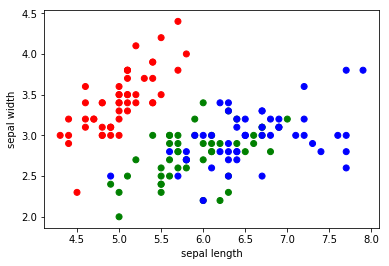

In [20]:
import matplotlib.pyplot as plt
x = iris_df["sepal length"]
y = iris_df["sepal width"]
iris_df["class"]
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}

plt.scatter(x, y, c = iris_df["class"].apply(lambda x: colors[x]))

#labels
plt.xlabel('sepal length')
plt.ylabel('sepal width')


plt.show()

Produce a 3-D plot using matplotlib. 

You should refer to the matplotlib documentation for 3d plotting - see https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

![Iris](images/iris.png)


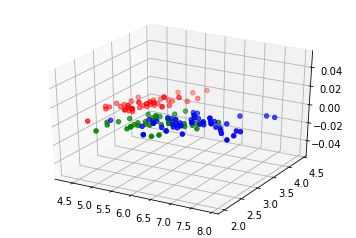

In [21]:
## put your plotting code here
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, zs=0, zdir='z', s=20, c=iris_df["class"].apply(lambda x: colors[x]), depthshade=True)



The plot shows the values of two attributes of Iris and indicates the flower class by color.

Now we learn a decision tree to classify the iris dataset.

Please read the documentation for Decision Trees in sklearn http://scikit-learn.org/stable/modules/tree.html#tree-classification

In [22]:
from sklearn import tree

attributes = iris_df[["sepal length","sepal width","petal length","petal width"]]
target = iris_df[["class"]]

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(attributes,target)

We can use the decision tree for prediction.

First lets predict the values of a feature vector containing [1,1,1,1]:

In [23]:
clf.predict([[1,1,1,1]])

array(['Iris-versicolor'], dtype=object)

Okay was predicted to be versicolor.

Now try predicting the values of the whole dataset that was used for learning the decision tree and compare with original training data:

In [24]:
prediction = clf.predict(attributes)
prediction_df = pd.DataFrame({"prediction": prediction})
prediction_df.head()

# create a result that contains the training data classes and the prediction result
# use the pandas function concat to join the data frames - note the axis parameter means to join columns
training_result = pd.concat([prediction_df, target], axis=1)
training_result.head


<bound method NDFrame.head of          prediction           class
0       Iris-setosa     Iris-setosa
1       Iris-setosa     Iris-setosa
2       Iris-setosa     Iris-setosa
3       Iris-setosa     Iris-setosa
4       Iris-setosa     Iris-setosa
5       Iris-setosa     Iris-setosa
6       Iris-setosa     Iris-setosa
7       Iris-setosa     Iris-setosa
8       Iris-setosa     Iris-setosa
9       Iris-setosa     Iris-setosa
10      Iris-setosa     Iris-setosa
11      Iris-setosa     Iris-setosa
12      Iris-setosa     Iris-setosa
13      Iris-setosa     Iris-setosa
14      Iris-setosa     Iris-setosa
15      Iris-setosa     Iris-setosa
16      Iris-setosa     Iris-setosa
17      Iris-setosa     Iris-setosa
18      Iris-setosa     Iris-setosa
19      Iris-setosa     Iris-setosa
20      Iris-setosa     Iris-setosa
21      Iris-setosa     Iris-setosa
22      Iris-setosa     Iris-setosa
23      Iris-setosa     Iris-setosa
24      Iris-setosa     Iris-setosa
25      Iris-setosa     Iris-setos

How can we work out the percentage of correctly classified examples - that is where prediction is equal to the target class in Python?

In [25]:
# write the code to calculate the misclassifications here...
# calculate the proportion of records where the predicted class is not equal to the actual class
df1=training_result.iloc[:,0]==training_result.iloc[:,1]
df2=df1.describe()
Result=df2.freq/len(attributes.index)
Result

1.0

#### Training data

You will have noticed there was a very high correspondance between the target and the classification by the decision tree which is not surprising given the decision tree was learned from this information.

What if we don't use all of the training data for learning the decision model?

In the following we use every second line in the original data file to learn the decision tree that is based on only half the data (the example uses every second row to learn the decision tree):

In [26]:
attributes_training = attributes[attributes.index % 2 != 0]  # Use very 2rd row, exclude every second element starting from 0 
                                                            #(note: % is the modulo operator)
target_training = target[target.index % 2 != 0] # every second row

# learn the decision tree
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf.fit(attributes_training,target_training)

Now lets use this model for prediction

In [27]:
attributes_test = attributes[attributes.index % 2 != 1]  # Use very 2rd row, exclude every second element starting from 0 
                                                            #(note: % is the modulo operator)

prediction = clf.predict(attributes_test)
prediction_df_1 = pd.DataFrame({"prediction": prediction})
prediction_df_1.head()

,prediction
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


To evaluate how good the decision tree is at making predictions on "new", unseen data (that is unseen during the process of constructing the model) compare the actual value of the target (ie the one in the file) with decision tree predictions.

In [28]:
actual_class_test = target[target.index % 2 != 1] 
actual_class_test.index=range(75)

training_result = pd.concat([prediction_df_1, actual_class_test], axis=1)

training_result

,prediction,class
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-setosa,Iris-setosa
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-setosa,Iris-setosa


Looking at the above you can quickly observe the results of the prediction differ from the original dataset. 

Use your method to calculate the misclassification percentage to evaluate the decision tree classifier

In [29]:
# To tell whether the prediction is equal to the target class,if it equals,return"True",else return "False"
mp1=training_result.iloc[:,0]==training_result.iloc[:,1]
num=np.sum(mp1) # the total number of "True"
misclassification=1-num/len(attributes.index)
misclassification

0.5333333333333333

## 4. Exercise

Now download another dataset from the UCI Machine Learning Repository and perform a similar analysis.

Make sure to choose one the classification problems: https://archive.ics.uci.edu/ml/datasets.html?format=&task=cla&att=&area=&numAtt=&numIns=100to1000&type=&sort=nameUp&view=table

It would be a good idea to have a look also at the dataset in your browser to find one using csv format :-)

1. First perform some initial examinations of the data using head etc
1. Then generate summary statistics
1. Next generate some plots to visualise the data
1. Then learn a decision tree classifier 

In [30]:
# You can put your code here and try to make it easy for another person to read.
# For the final version you probably don't need more than one cells for each of the 
# points 1-4 above. Make sure to delete  empty cells when you are finished using the little 
# sissors icon at the top
import pandas as pd
import numpy as np
student_set=pd.read_csv("student.csv",sep=';',header=0)
student_set.head(10)
# student_set.columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [31]:

for index in ['sex']:
    student_set[index] = (student_set[index] == "F").astype('int')
for index in ['address']:
    student_set[index] = (student_set[index] == "U").astype('int')
for index in ['Pstatus']:
    student_set[index] = (student_set[index] == "A").astype('int')
for index in ['Mjob']:
    student_set[index] = (student_set[index] == "at_home").astype('int')
for index in ['Fjob']:
    student_set[index] = (student_set[index] == "teacher").astype('int')
for index in ['school']:
    student_set[index] = (student_set[index] == "GP").astype('int')
for index in ['famsize']:
    student_set[index] = (student_set[index] == "GT3").astype('int')
for index in ['reason']:
    student_set[index] = (student_set[index] == "course").astype('int')
for index in ['guardian']:
    student_set[index] = (student_set[index] == "mother").astype('int')
    
       
for index in['schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']:
    student_set[index] = (student_set[index]=="yes").astype('int')
#     print(student_set)

In [32]:
student_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
school,395.0,0.883544,0.321177,0.0,1.0,1.0,1.0,1.0
sex,395.0,0.526582,0.499926,0.0,0.0,1.0,1.0,1.0
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
address,395.0,0.777215,0.416643,0.0,1.0,1.0,1.0,1.0
famsize,395.0,0.711392,0.453690,0.0,0.0,1.0,1.0,1.0
Pstatus,395.0,0.103797,0.305384,0.0,0.0,0.0,0.0,1.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
Mjob,395.0,0.149367,0.356902,0.0,0.0,0.0,0.0,1.0
Fjob,395.0,0.073418,0.261152,0.0,0.0,0.0,0.0,1.0


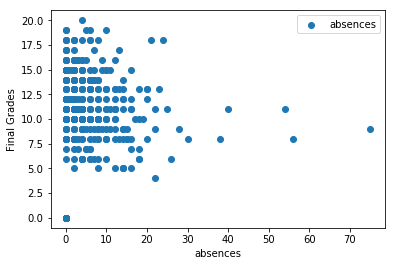

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
#it shows the grades changes with freetime sttudents had.
plt.scatter(student_set['absences'],student_set['G3'],label="absences")
plt.ylabel('Final Grades')
plt.xlabel('absences')
plt.legend()
plt.show()

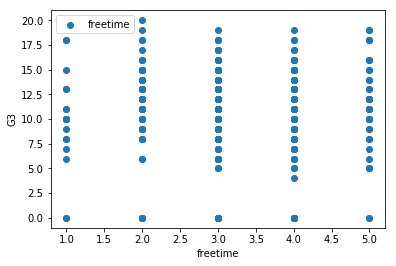

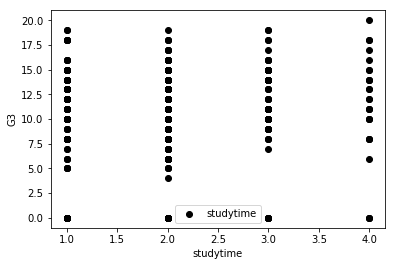

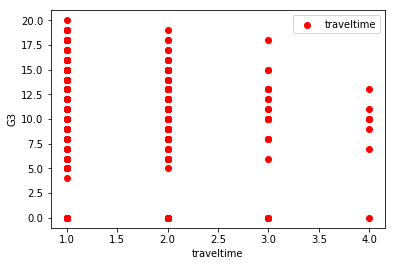

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [34]:
plt.scatter(student_set['freetime'],student_set['G3'],label="freetime")
plt.xlabel('freetime')
plt.ylabel('G3')
plt.legend()
plt.show()
plt.scatter(student_set['studytime'],student_set['G3'],label="studytime",color='black')
plt.xlabel('studytime')
plt.ylabel('G3')
plt.legend()
plt.show()
plt.scatter(student_set['traveltime'],student_set['G3'],label="traveltime",color='red')
plt.xlabel('traveltime')
plt.ylabel('G3')
plt.legend()
plt.show()
student_set.columns


In [39]:
from sklearn import tree
attributes = student_set[["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
       "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime",
       "failures", "schoolsup", "famsup", "paid", "activities", "nursery",
       "higher", "internet", "romantic", "famrel", "freetime", 'goout', "Dalc",
       "Walc", "health", "absences"]]
target = student_set[["G3"]]
rel = tree.DecisionTreeClassifier(criterion='entropy')
rel = rel.fit(attributes,target)
rel.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
prediction = rel.predict(attributes)
prediction_df = pd.DataFrame({"prediction": prediction})
prediction_df.head()

# create a result that contains the training data classes and the prediction result
# use the pandas function concat to join the data frames - note the axis parameter means to join columns
training_result = pd.concat([prediction_df, target], axis=1)
training_result.head


<bound method NDFrame.head of      prediction  G3
0             6   6
1             6   6
2            10  10
3            15  15
4            10  10
5            15  15
6            11  11
7             6   6
8            19  19
9            15  15
10            9   9
11           12  12
12           14  14
13           11  11
14           16  16
15           14  14
16           14  14
17           10  10
18            5   5
19           10  10
20           15  15
21           15  15
22           16  16
23           12  12
24            8   8
25            8   8
26           11  11
27           15  15
28           11  11
29           11  11
..          ...  ..
365          10  10
366          13  13
367           0   0
368          10  10
369          11  11
370           9   9
371          12  12
372          11  11
373           5   5
374          19  19
375          10  10
376          15  15
377          10  10
378          15  15
379          10  10
380          14  14
381       

## 5. Going forward
Spend some time to go over the work in this and the previous tutorial to become confortable with the material. Also don't worry too much if you are not quite comfortable with parts 3 and 4. Programming in Python, and programming generally, requires frequent consulting of docs and searching online especially when you are starting out with a new tool.